# Introduction to Machine Learning: Programming Assignment 3

This programming assignment has two parts.

In the first part, you will implement a Naïve Bayes Classifier and test it on a publicly available data set. 

In the second part, you will manipulate the data characteristics to understand how classifiers get impacted by the underlying bias in the training data. Focus will be on developing a COMPAS style risk assessment system.


## TASK 1: Naïve Bayes Classifier
In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

There are 3 types of Naïve Bayes algorithm:

1. Gaussian Naïve Bayes

2. Multinomial Naïve Bayes

3. Bernoulli Naïve Bayes

In this lab, we will fouse on the Gaussian Naïve Bayes algorithm.



In [1]:
# Load helpful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will use the ```Iris``` dataset for our experiments.

The Iris dataset is a classic in the field of machine learning. It contains 150 samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. There are three species of iris in the dataset, making it a multi-class classification problem.

In [2]:
# Load the data
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

### Task 1.1 View the dataset.
1. Write code to print out the feature and species categories with their names. ```Hint: check the keys of the dataset```
2. Plot the distribution for all the categories

In [3]:
# check the type of iris
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Print the features and species (target) names

#<-- write your code here-->
print("Feature names:", iris.feature_names)
print("Species (Target) names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Species (Target) names: ['setosa' 'versicolor' 'virginica']


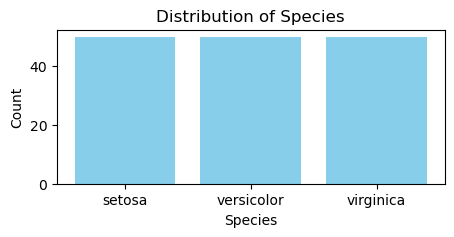

In [5]:
# Plot the distribution of the species (target) variable

plt.figure(figsize=(5, 2))
species_counts = np.bincount(iris.target)
species_names = iris.target_names
plt.bar(species_names, species_counts, color='skyblue')

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Species')
plt.show()

#<-- write your code here-->



### Task 1.2: Data Preparing. 
1. Please finish the following code to split the Iris dataset into training and testing dataset with a distribution of 80:20.
2. Print out the shape of each split subset.

In [6]:
from sklearn.model_selection import train_test_split

# store the feature matrix (X) and target vector (y)
X = iris.data
y = iris.target

In [7]:
# Split the data into training and test sets

#<-- write your code here-->
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [8]:
# Print the shapes of your training and test sets

#<-- write your code here-->
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


### Task 1.3 Build a Gaussian Naïve Bayes algorithm. 
- Step 1: **Calculate prior probabilities.** The prior probability of each class P(y) is the frequency of each class in the training set divided by the total number of samples.
- Step 2: **Calculate Mean and Variance for each feature per class.** For each class, calculate the mean and variance of each feature. These statistics are used to model the Gaussian distribution of each feature.
- Step 3: **Calculate likelihood for each class.**
- Step 4: **Compute the posterior probability.**

In [9]:
# Build a Guassian Naive Bayes model
class GaussianNaiveBayes:
    # Initialize the model
    def __init__(self):
        self.classes = None
        self.prior_prob = None
        self.mean = None
        self.var = None
        self.likelihood = None

    # Fit the model
    def fit(self, X, y):        
        self.classes = np.unique(y) # Get the unique classes
        self.prior_prob = np.zeros(len(self.classes)) # Initialize the prior probability
        self.mean = np.zeros((len(self.classes), X.shape[1])) # Initialize the mean
        self.var = np.zeros((len(self.classes), X.shape[1])) # Initialize the variance

        # Compute the prior probability, mean and variance for each class (ask for students)
        for i, c in enumerate(self.classes): 
            X_c = X[y == c]
            self.prior_prob[i] = X_c.shape[0] / X.shape[0]
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0)

    # Predict the class
    def predict(self, X):
        # Initialize the likelihood
        self.likelihood = np.zeros((X.shape[0], len(self.classes))) 
        # Compute the likelihood for each class
        for i, c in enumerate(self.classes):
            self.likelihood[:, i] = self.gaussian_pdf(X, self.mean[i], self.var[i]).prod(axis=1)

            #<-- write your code here-->

        # Compute the posterior probability with eqution: posterior_prob = likehood * prior_prob

        #<-- write your code here-->
        posterior_prob = self.likelihood * self.prior_prob
        
        # Return the class with the highest posterior probability
        return self.classes[np.argmax(posterior_prob, axis=1)]
        
        #<-- write your code here-->
    def gaussian_pdf(self, X, mean, sigma_squared):
        coeff = 1 / np.sqrt(2 * np.pi * sigma_squared)
        exponent = np.exp(-0.5 * ((X - mean) ** 2) / sigma_squared)
        return coeff * exponent



### Task 1.4 Build a Gaussian Naïve Bayes classifier with scikit learn library
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [10]:
# Build a Guassian Naive Bayes model with sklearn

#<-- write your code here-->
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier object
gnb = GaussianNB()

gnb.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = gnb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}".format(accuracy*100))

Accuracy of Gaussian Naive Bayes classifier on test set: 100.00


### Task 1.4 Training, Testing and Comparison
1. Fit the both Gaussian Naïve Bayes classifiers with the training data and use the testing data to make prediction.
2. Show the results with accuracy for both classifiers (manually implementation and the sklearn's).

In [11]:
# Train the models

#<-- write your code here-->
custom_gnb = GaussianNaiveBayes()

# Fit the custom model with the training data
custom_gnb.fit(X_train, y_train)

# Make predictions with the custom model
custom_y_pred = custom_gnb.predict(X_test)




# Make predictions

#<-- write your code here-->
from sklearn.naive_bayes import GaussianNB
sklearn_gnb = GaussianNB()

# Fit the sklearn model with the training data
sklearn_gnb.fit(X_train, y_train)

# Make predictions with the sklearn model
sklearn_y_pred = sklearn_gnb.predict(X_test)

In [12]:
# Compute the classification accuracy for both models

#<-- write your code here-->
# Evaluate the custom model's accuracy
custom_accuracy = accuracy_score(y_test, custom_y_pred)
print("Accuracy of custom Gaussian Naive Bayes classifier: {:.2f}".format(custom_accuracy*100))


# Evaluate the sklearn model's accuracy
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print("Accuracy of sklearn Gaussian Naive Bayes classifier: {:.2f}".format(sklearn_accuracy*100))

Accuracy of custom Gaussian Naive Bayes classifier: 100.00
Accuracy of sklearn Gaussian Naive Bayes classifier: 100.00


## TASK 2: Exploring Data Bias with a COMPAS-Style Risk Assessment System
In this task, we want to observe ethical considerations and potential biases in machine learning models, using a COMPAS-style risk assessment system as a case study.

A COMPAS-style risk assessment refers to systems like the Correctional Offender Management Profiling for Alternative Sanctions (COMPAS), which is a tool used in the criminal justice system to assess the likelihood of a defendant becoming a recidivist, or reoffending, if released. 

A COMPAS recidivism racial bias dataset will be used, and the details can be viewed [here](https://github.com/propublica/compas-analysis).

In [13]:
# download the COMPAS dataset
#import wget

#url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
#filename = wget.download(url)
!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
# view the first few rows of the dataset
import pandas as pd
#df_compas = pd.read_csv(filename)
df_compas = pd.read_csv('compas-scores-two-years.csv')
df_compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [15]:
df_compas.keys()

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [16]:
# Example of selecting relevant features and encoding categorical variables
features = ['race', 'age', 'c_charge_degree'] # you may choose your own features
target = 'two_year_recid'

# Selecting a subset of the data for simplicity
df_compas = df_compas[features + [target]]

# Encoding categorical features
df_compas = pd.get_dummies(df_compas, columns=['race', 'age', 'c_charge_degree'], drop_first=False)
df_compas = df_compas.dropna()

### Task 2.1: Splite dataset
1. Split the dataset into training and testing dataset with a distribution of 80:20.
2. Print out the shape of each split subset.

In [17]:
from sklearn.model_selection import train_test_split

X = df_compas.drop('two_year_recid', axis=1)
y = df_compas['two_year_recid']

# Split the data into training and test sets

#<-- write your code here-->
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [18]:
# Print the shapes of your training and test sets

#<-- write your code here-->
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5771, 73)
Shape of X_test: (1443, 73)
Shape of y_train: (5771,)
Shape of y_test: (1443,)


### Task 2.2: Build a Gaussian Naïve Bayes classifier and train the model with training set

In [19]:
# Build a Guassian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#<-- write your code here-->
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Task 2.3: Test the model and show the results of accuracy

In [20]:
# Make predictions and compute the classification accuracy

#<-- write your code here-->
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gaussian Naive Bayes classifier on test set: {:.2f}%".format(accuracy * 100))

Accuracy of the Gaussian Naive Bayes classifier on test set: 45.25%


### Task 2.4: Print out the false positive rate, false negative rate for each race group.

False positive means a person was predicted to re-offend but did not; 

False negative means a person was predicted not to re-offend but did re-offend


#### Task 2.4.1: Create a function to calculate the false positive rate (FPR) and false negative rate (FNR).


In [21]:
# a function to calculate the false positive rate and false negative rate

# <-- write your code here-->
from sklearn.metrics import confusion_matrix

def calculate_fpr_fnr(y_true, y_pred):

    # Generate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    fpr = fp / (fp + tn)
    
    fnr = fn / (fn + tp)
    
    return fpr, fnr


#### Task 2.4.2: Calculate the FPR and FNR for each race.
You can find out the races from the records in the dataframe.

In [22]:
# See the FPR and FNR for each race

# <-- write your code here-->
# List all column names to identify the race columns
print(df_compas.columns)

# Assuming the one-hot encoded race columns are prefixed with 'race_'
race_columns = [col for col in df_compas.columns if col.startswith('race_')]

race_fpr_fnr = {}


for race in race_columns:
    # Filter the data for each race
    mask = X_test[race] == 1
    X_race = X_test[mask]
    y_race_true = y_test[mask]
    y_race_pred = y_pred[mask]

    fpr, fnr = calculate_fpr_fnr(y_race_true, y_race_pred)
    race_fpr_fnr[race] = (fpr, fnr)


for race, rates in race_fpr_fnr.items():
    print(f"{race} - FPR: {rates[0]:.2f}, FNR: {rates[1]:.2f}")



Index(['two_year_recid', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24',
       'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31',
       'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38',
       'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45',
       'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52',
       'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59',
       'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66',
       'age_67', 'age_68', 'age_69', 'age_70', 'age_71', 'age_72', 'age_73',
       'age_74', 'age_75', 'age_76', 'age_77', 'age_78', 'age_79', 'age_80',
       'age_83', 'age_96', 'c_charge_degree_F', 'c_charge_degree_M'],
      dtype='object')
race_African-American - FPR: 0.95, FNR: 0.03
race_Asian - FPR: 0.00, FN

### Task 2.5: Plot the FPR and FNR in figure(s) to analyze the bias.
Please note down your observation in the last text cell. 

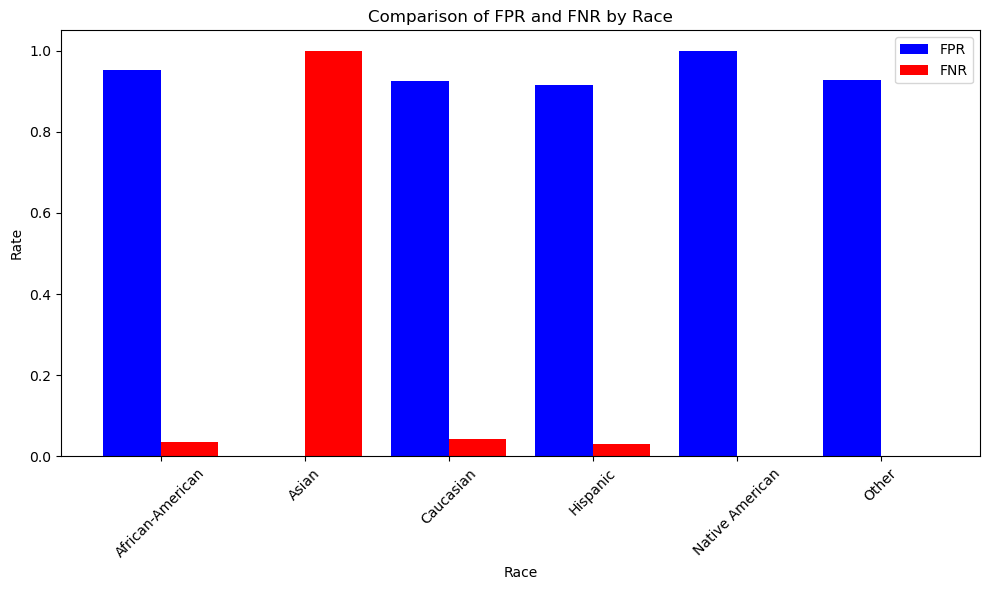

In [23]:
# Draw the plot to compare the FPR and FNR for each

#<-- write your code here-->
import matplotlib.pyplot as plt

# Assuming race_fpr_fnr stores tuples in the format (fpr, fnr)
fprs = [rates[0] for rates in race_fpr_fnr.values()]  
fnrs = [rates[1] for rates in race_fpr_fnr.values()]  


races = [race.split('_')[1] if '_' in race else race for race in race_columns] 

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting FPR
plt.bar([x for x in range(len(races))], fprs, color='blue', width=0.4, label='FPR')

# Plotting FNR
plt.bar([x + 0.4 for x in range(len(races))], fnrs, color='red', width=0.4, label='FNR')

plt.xlabel('Race')
plt.ylabel('Rate')
plt.title('Comparison of FPR and FNR by Race')
plt.xticks([x + 0.2 for x in range(len(races))], races, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()



Write down your observation here:FPR is represented by the blue bars. FPR is generally high across all race categories except for the Asian category, where it is significantly lower.
FNR is represented by the red bars. The FNR is notably lower than the FPR for all races. For the Asian category,the FNR is high compared to FPR.
Below is the comparision:
African-American group has a high FPR, which indicates that this model is more likely to falsely predict recidivism for African-American individuals.
Caucasian group also shows a significant FPR but less than that of the African-American group.
Other category has a similar FPR to the majority of groups, except that of Asian.
The Asian group has a significantly lower FPR, which states model is least likely to falsely predict recidivism for Asian individuals.
There seems to be a disparity in the FPR among different races, which raises concerns about potential bias in the model against certain groups of races, mainly African Americans.
The extremely low FNR across all the groups shows the model is conservative in predicting non-recidivism. However the disproportionally higher FPR in certain groups indicates a bias towards predicting recidivism more frequently for those groups in particular.